# Problem Statement

Five million Americans are currently living with heart diseases, and the numbers are expected to rise. It is very important to understand the factors which causes Heart-attacks so that certain precaution can be taken by individuals.
In-order to understand the reasons of the Heart-attack, a data was collected from various hospitals across US which is given in US_Heart_Patients.csv. In the data set there are Heart-Att indicates whether the person suffered from Heart attack or not.

Perform EDA on the data and build a model which will predict whether the person will suffer from Heart-attack or not.


## Importing required packages and dataset

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
chd_df = pd.read_csv("US_Heart_Patients.csv")

## Checking the data

In [51]:
chd_df.head(10) 

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [52]:
chd_df.shape

(4240, 16)

In [53]:
chd_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


Gender column is of type object i.e. strings. This need to be converted to ordinal type for building RF model

In [54]:
chd_df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [55]:
x = [];
for i in chd_df.columns:
    x.append(i.lower())
    
print(x)    
chd_df.columns = x

['gender', 'age', 'education', 'currentsmoker', 'cigsperday', 'bp meds', 'prevalentstroke', 'prevalenthyp', 'diabetes', 'tot cholesterol', 'systolic bp', 'diastolic bp', 'bmi', 'heartrate', 'glucose', 'heart-att']


In [56]:
chd_df.columns = ['gender', 'age', 'edu', 'smokes', 'cigs', 'bpmeds', 'stroke', 'hyper', 'diab', 'chol', 'sbp', 'dbp', 'bmi', 'hr', 'glu', 'htk']

In [57]:
numcols = ['age', 'cigs', 'chol', 'sbp', 'dbp', 'bmi', 'hr', 'glu']

In [58]:
chd_df[numcols].describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,50.0,9.0,32.0,42.0,49.0,56.0,70.0
cigs,4209.0,9.0,12.0,0.0,0.0,0.0,20.0,70.0
chol,4180.0,237.0,45.0,107.0,206.0,234.0,263.0,696.0
sbp,4236.0,132.0,22.0,84.0,117.0,128.0,144.0,295.0
dbp,4235.0,83.0,12.0,48.0,75.0,82.0,90.0,142.0
bmi,4216.0,26.0,4.0,16.0,23.0,25.0,28.0,57.0
hr,4236.0,76.0,12.0,44.0,68.0,75.0,83.0,143.0
glu,3849.0,82.0,24.0,40.0,71.0,78.0,87.0,394.0


# EDA

### Summary of the data

In [59]:
chd_df.describe(include="all")

,gender,age,edu,smokes,cigs,bpmeds,stroke,hyper,diab,chol,sbp,dbp,bmi,hr,glu,htk
count,4232,4238.000000,4130.000000,4237.000000,4209.000000,4180.000000,4231.000000,4238.000000,4238.000000,4180.000000,4236.000000,4235.000000,4216.000000,4236.000000,3849.000000,4240.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.579283,1.979903,0.494218,9.001901,0.029665,0.005909,0.310524,0.025720,236.677273,132.362370,82.901889,25.798916,75.867800,81.951936,0.151887
std,NaN,8.572875,1.019943,0.500026,11.920742,0.169682,0.076650,0.462763,0.158316,44.616098,22.039244,11.914467,4.075256,11.999488,23.958428,0.358953
min,NaN,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,NaN,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,NaN,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.395000,75.000000,78.000000,0.000000
75%,NaN,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000


### Frequency of the levels in the Gender column

In [60]:
# Get the count of Male and Female
df = chd_df
df.gender.value_counts()

Female    2414
Male      1818
Name: gender, dtype: int64

### Proportion of observations in each of the target classes

In [61]:
df['htk'].value_counts(1)

0    0.848113
1    0.151887
Name: htk, dtype: float64

In [62]:
# Get the proportion in each class


### Check for duplicate data

In [63]:
# Are there any duplicates ?
df.duplicated().sum()

0

There are no duplicates in the data

### Check for missing value in any column

In [64]:
# Are there any missing values ?
df.isnull().sum()

gender      8
age         2
edu       110
smokes      3
cigs       31
bpmeds     60
stroke      9
hyper       2
diab        2
chol       60
sbp         4
dbp         5
bmi        24
hr          4
glu       391
htk         0
dtype: int64

Missing values exists for all the independent varibles with some variables having very high missing values

In [65]:
df.dropna().shape

(3616, 16)

If we were to drop all the observations having missing values, then number of observations reduces from 4240 to 3616 rows for the same 16 columns.

As we see in the below boxplot continuous variables have outliers present.

So, we will impute the continuous variables with median value, and drop the missing values corresponding to categorical variables.

<AxesSubplot:>

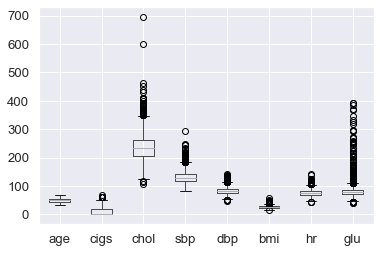

In [66]:
chd_df[['age', 'cigs', 'chol', 'sbp', 'dbp','bmi','hr','glu']].boxplot()

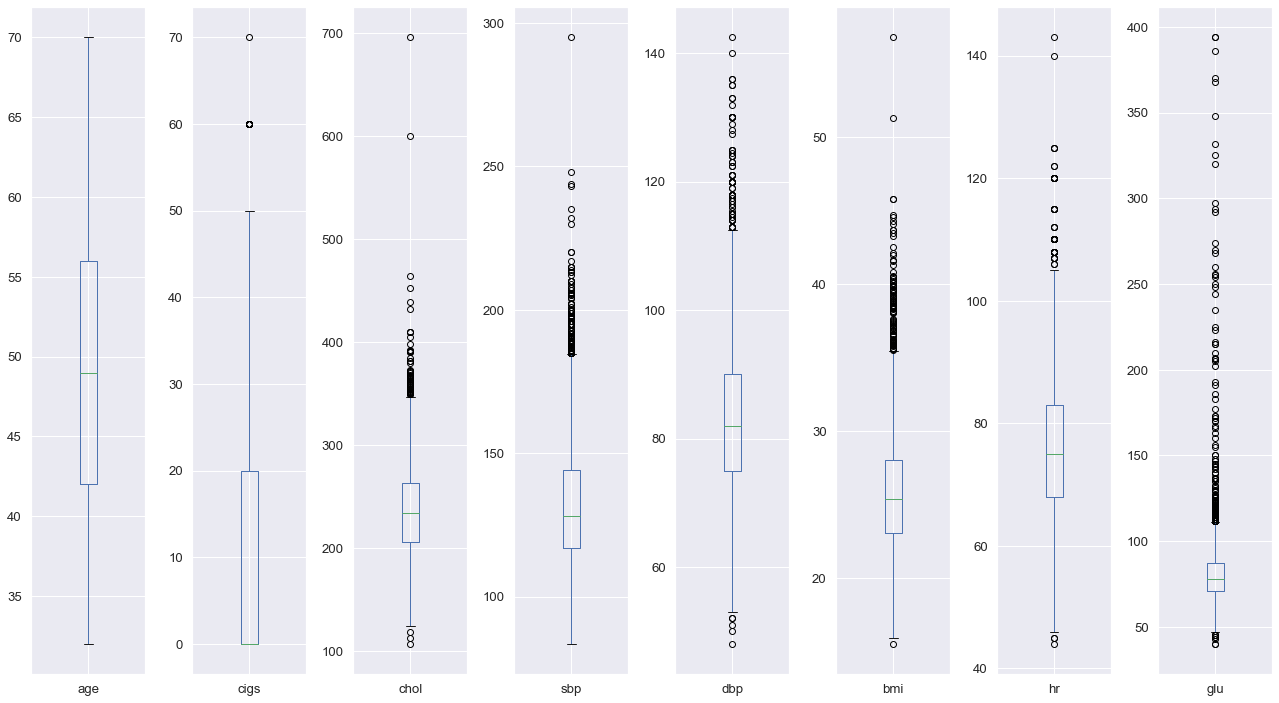

In [67]:
df[numcols].plot(kind='box', subplots=True, figsize=(18,10))
plt.tight_layout()

In [68]:
for column in df[numcols]:
    median = df[column].median()
    df[column] = df[column].fillna(median)

In [69]:
df.isnull().sum()

gender      8
age         0
edu       110
smokes      3
cigs        0
bpmeds     60
stroke      9
hyper       2
diab        2
chol        0
sbp         0
dbp         0
bmi         0
hr          0
glu         0
htk         0
dtype: int64

Only categorical variables have misisng values now

In [70]:
df.dropna(inplace=True)
df.shape

(4055, 16)

After removing these missing values, the number of observations is now 4055

### Checking for Outliers

In [71]:
# construct box plot for continuous variables
def treat_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lr = Q1 - (1.5*IQR)
    ur = Q3 + (1.5*IQR)
    return lr,ur

Outliers exists for most of the continuous variables, and also has many outliers

### Treating the Outliers

In [72]:
# Complete the function to calculate lower_range and upper_range


In [73]:
for feature in df[numcols]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,chd_df[feature])
    df[feature]=np.where(df[feature]<lr,lr,chd_df[feature])

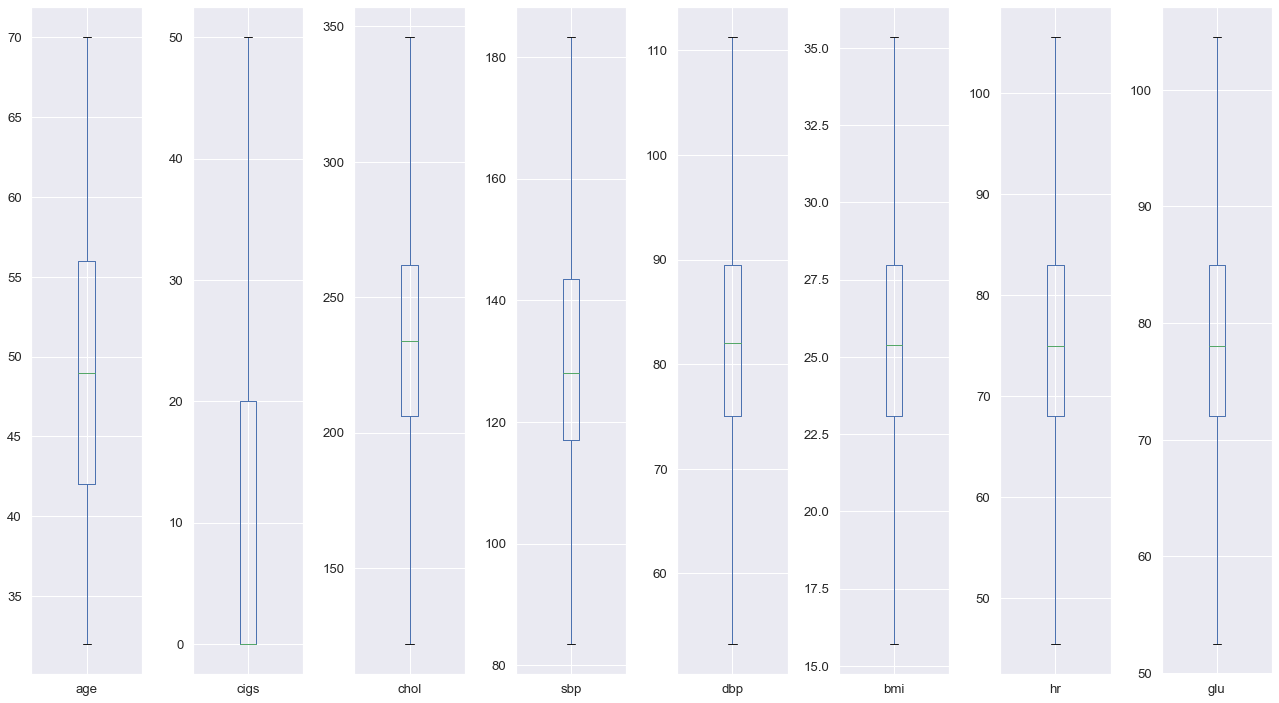

In [74]:
df[numcols].plot(kind='box', subplots=True, figsize=(18,10))
plt.tight_layout()

There are no outliers after treating them

### Checking pairwise distribution of the continuous variables

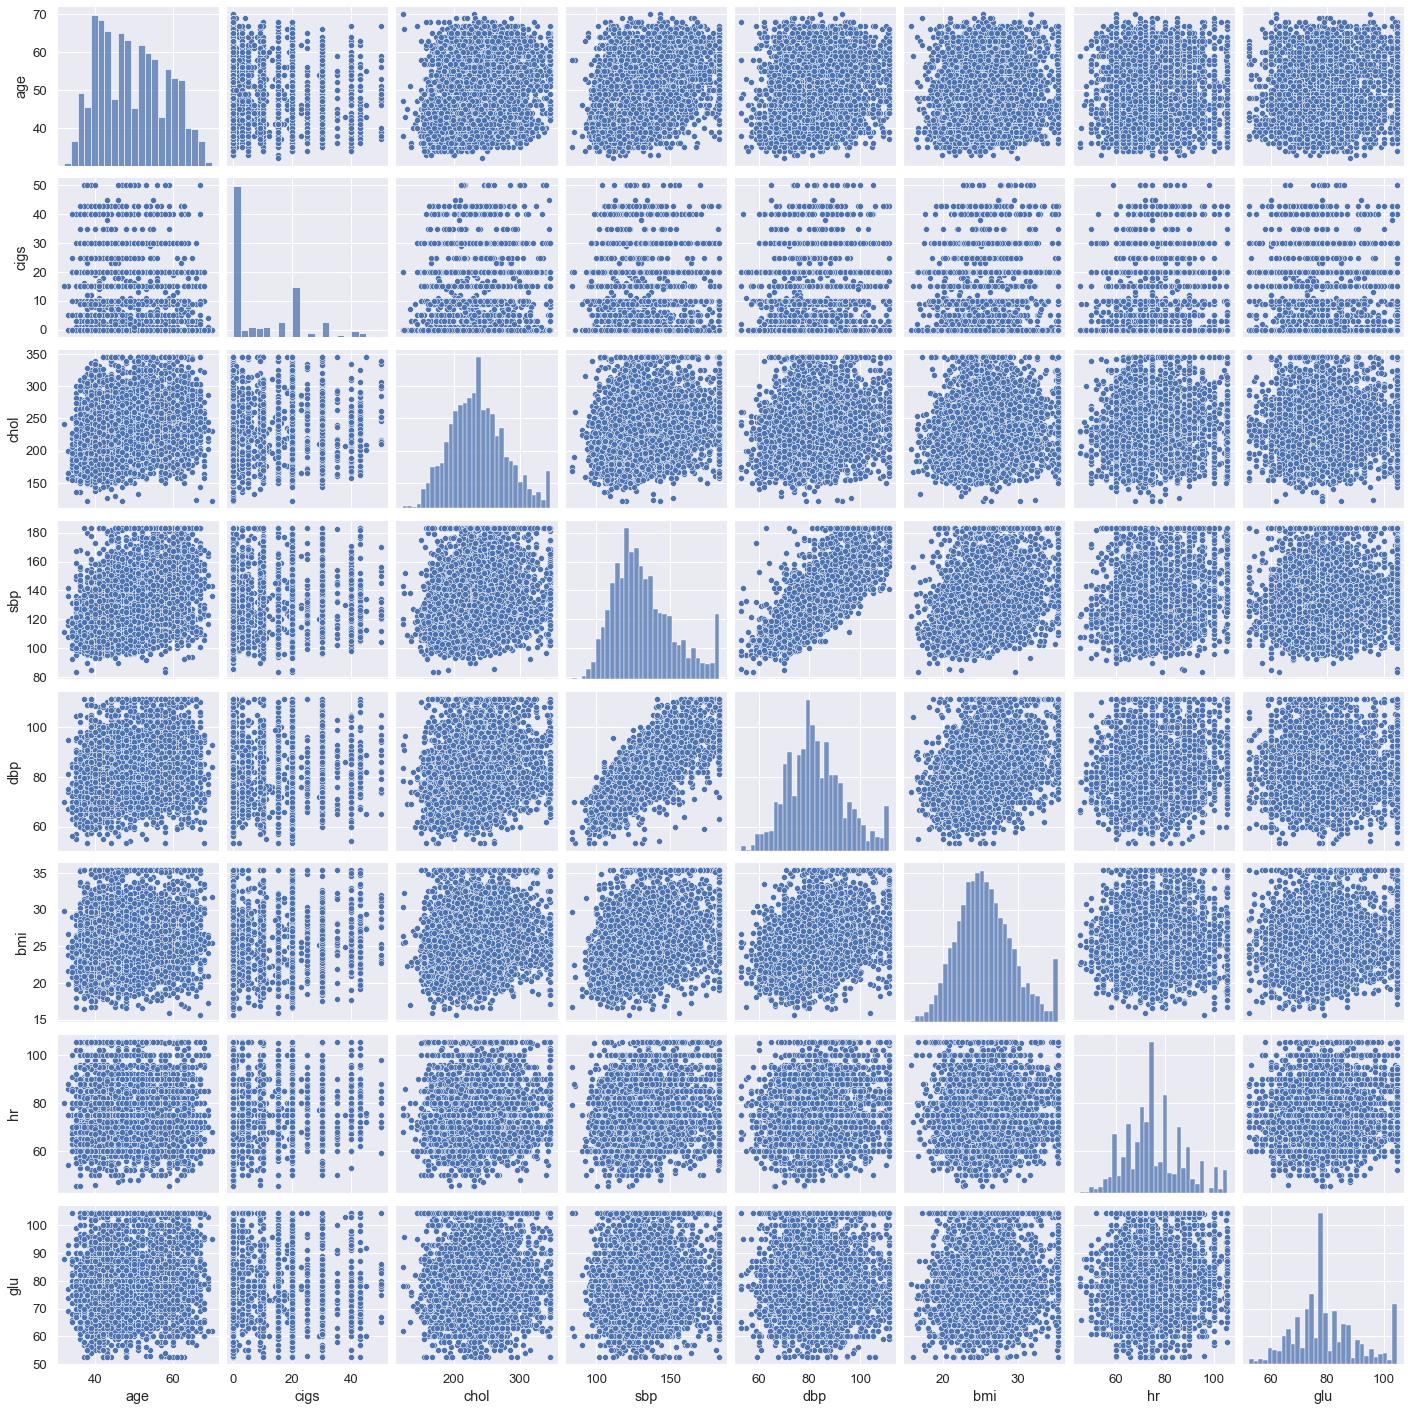

In [75]:
sns.pairplot(df[numcols])

### Checking for Correlations

<AxesSubplot:>

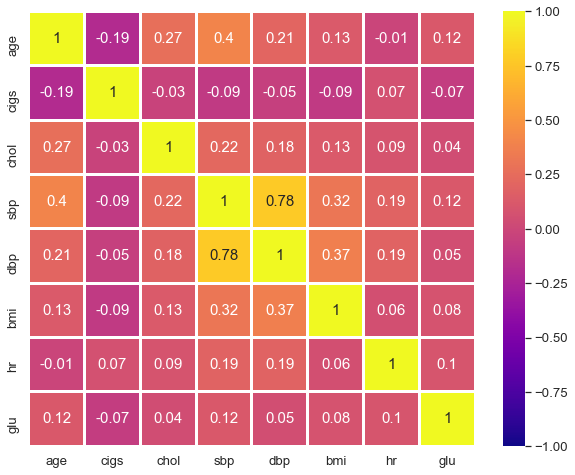

In [76]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[numcols].corr().round(2), vmin=-1, vmax=1, annot=True, cmap='plasma', annot_kws={'size': 15}, linewidths=2)

In [77]:
df.head(10)

,gender,age,edu,smokes,cigs,bpmeds,stroke,hyper,diab,chol,sbp,dbp,bmi,hr,glu,htk
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


   
      
Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
The following code loops through each column and checks if the column type is object then converts those columns into  categorical with each distinct value becoming a category or code.

In [78]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [79]:
df.head(10)

,gender,age,edu,smokes,cigs,bpmeds,stroke,hyper,diab,chol,sbp,dbp,bmi,hr,glu,htk
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


Female converted to 0, and Male to 1

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4055 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  4055 non-null   int8   
 1   age     4055 non-null   float64
 2   edu     4055 non-null   float64
 3   smokes  4055 non-null   float64
 4   cigs    4055 non-null   float64
 5   bpmeds  4055 non-null   float64
 6   stroke  4055 non-null   float64
 7   hyper   4055 non-null   float64
 8   diab    4055 non-null   float64
 9   chol    4055 non-null   float64
 10  sbp     4055 non-null   float64
 11  dbp     4055 non-null   float64
 12  bmi     4055 non-null   float64
 13  hr      4055 non-null   float64
 14  glu     4055 non-null   float64
 15  htk     4055 non-null   int64  
dtypes: float64(14), int64(1), int8(1)
memory usage: 510.8 KB


### Capture the target column into separate vectors for training set and test set

In [81]:
x = df.drop(["htk"], axis=1)

y = df.pop("htk")

### Splitting data into training and test set

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)


In [83]:
y_train.value_counts()

0    2424
1     414
Name: htk, dtype: int64

In [84]:
y_train.value_counts(1)

0    0.854123
1    0.145877
Name: htk, dtype: float64

In [85]:
y_test.value_counts()

0    1022
1     195
Name: htk, dtype: int64

In [86]:
y_test.value_counts(normalize=True)

0    0.83977
1    0.16023
Name: htk, dtype: float64

Observations are almost equally distributed between the train and test sets w.r.t target classes

# Ensemble RandomForest Classifier

#### Building the Random Forest model

In [173]:
#Build a RandomForestCassifier wit n_estimators 100, max_features 6, andfit it on the training data

from sklearn.ensemble import RandomForestClassifier

In [89]:
# n_estimators is the number of trees to build
rfcl = RandomForestClassifier(n_estimators=100, 
                              max_features=6, 
                              random_state=0)
rfcl = rfcl.fit(X_train, y_train)
rfcl

RandomForestClassifier(max_features=6, random_state=0)

##### Predicting Train and Test data with the RF Model

In [90]:
pred_train = rfcl.predict(X_train)
pred_test = rfcl.predict(X_test)

**Train Accuracy**


In [91]:
rfcl.score(X_train,y_train)

1.0

#### Evaluating model performance with confusion matrix

In [92]:
from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix, accuracy_score, plot_roc_curve

In [93]:
def eval_models(model, x, y, preds):
    print('Accuracy Score: ', accuracy_score(y,preds))
    plot_confusion_matrix(model, x, y)
    plt.show()
    plot_roc_curve(model, x, y)
    plt.show()
    print(classification_report(y,preds))

#### Evaluating model performance on the training data

Accuracy Score:  1.0


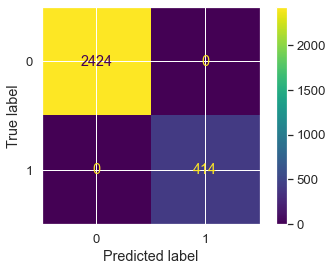

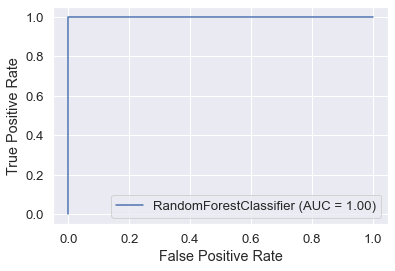

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2424
           1       1.00      1.00      1.00       414

    accuracy                           1.00      2838
   macro avg       1.00      1.00      1.00      2838
weighted avg       1.00      1.00      1.00      2838



In [94]:
# Get the confusion matrix on the train data
# confusion_matrix(train_labels,ytrain_predict)
# sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
# plt.xlabel('Predicted Label')
# plt.ylabel('Actual Label')
# plt.title('Confusion Matrix')
# plt.show()
eval_models(rfcl, X_train, y_train, pred_train)

In [179]:
# print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2424
           1       1.00      1.00      1.00       414

    accuracy                           1.00      2838
   macro avg       1.00      1.00      1.00      2838
weighted avg       1.00      1.00      1.00      2838



In [180]:
# print('Accuracy', ((2424+414)/(2424+414)))
# print('Sensitivity',((414/414))) #TP/Actual yes
# print('Specificity',(2424/2424)) #TN/Actual no
# print('Precision',(414/414)) #TP/Predicted yes

Accuracy 1.0
Sensitivity 1.0
Specificity 1.0
Precision 1.0


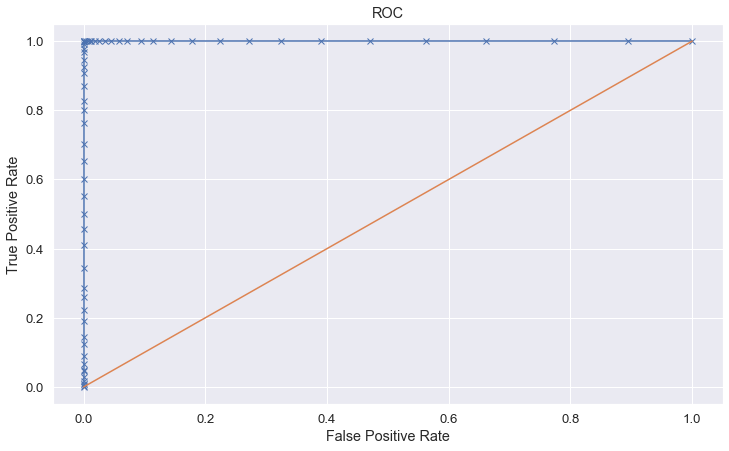

Area under Curve is 1.0


In [181]:
# from sklearn.metrics import roc_curve,roc_auc_score
# rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])
# plt.figure(figsize=(12,7))
# plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
# plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
# plt.show()
# print('Area under Curve is', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))

#### Evaluating model performance on the test data

Accuracy Score:  0.8430566967953985


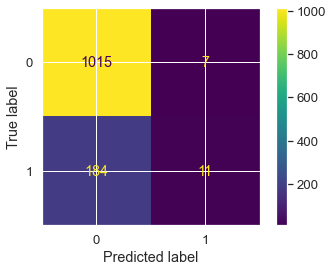

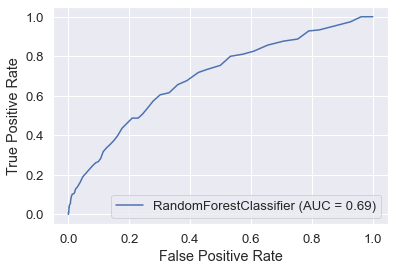

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1022
           1       0.61      0.06      0.10       195

    accuracy                           0.84      1217
   macro avg       0.73      0.52      0.51      1217
weighted avg       0.81      0.84      0.78      1217



In [96]:
# confusion_matrix(test_labels,ytest_predict)
# sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
# plt.xlabel('Predicted Label')
# plt.ylabel('Actual Label')
# plt.title('Confusion Matrix')
# plt.show()
eval_models(rfcl, X_test, y_test, pred_test)

In [183]:
# print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1022
           1       0.61      0.06      0.10       195

    accuracy                           0.84      1217
   macro avg       0.73      0.52      0.51      1217
weighted avg       0.81      0.84      0.78      1217



In [184]:
# print('Accuracy', ((1019+13)/(1019+3+182+13)))
# print('Sensitivity',((13/(13+182)))) 
# print('Specificity',(1019/(1019+3)))
# print('Precision',(13/(13+3)))

Accuracy 0.847986852917009
Sensitivity 0.06666666666666667
Specificity 0.99706457925636
Precision 0.8125


**Test Accuracy**

In [185]:
# rfcl.score(X_test,test_labels)

0.8430566967953985

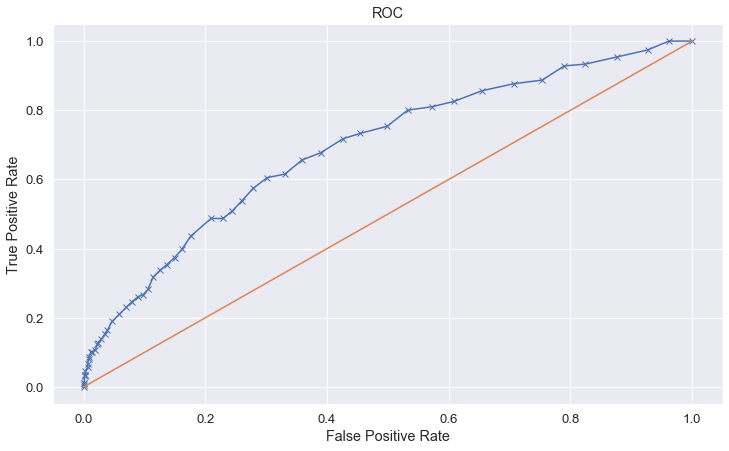

Area under Curve is 0.6934969140448592


In [186]:
# #from sklearn.metrics import roc_curve,roc_auc_score
# rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
# plt.figure(figsize=(12,7))
# plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
# plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
# plt.show()
# print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))

# Result:

Area under the curve on the training data is 100%, which indicates very high performance that all classes have been correctly classified. Whereas on the test data model performance is average with AUC 69%, which is very less compare to the performance of the training data.  
  

Since we are building a model to predict if a person will have a heart disease or not, for practical purposes, we will be more interested in correctly classifying 1 (having heart disease) than 0(not having heart disease). 

If a person not having a heart disease, is incorrectly predicted to have a heart disease, in this situation, the cost and other impact to life is less severe, than when we incorrectly predict a person, who actually have a heart disease, as not having a heart disease.

From the Random Forest model,looking at the Accuracy,Sensitivity,Speficity,Recall and AUC, we have 100% results on the training data, whereas on the Test data, performance is lesser,especially in predicting Class 1.  
 
This is because overfitting has happened on the training data, and therefore the model is weak in generalizing and predicting any new data.

In this model, we have hard-coded the hyper parameter values. We can optimize/fine-tune the random forest model, by trying different values for the hyper parameters to see if the model performance is improving.

### Grid Search for finding out the optimal values for the hyper parameters

Note: runs for longer time on more data with more params
**As it may take too long to get the results, we can put these values:{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 200}**

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

# the above gives 72 combinations

rfcl = RandomForestClassifier(random_state=0)

# 72 * 5 times the algorithm runs as cross validation is set to 5

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [100]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [127]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 200}

In [128]:
best_grid = grid_search.best_estimator_

In [129]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=50, n_estimators=200, random_state=0)

In [130]:
grid_pred_train = best_grid.predict(X_train)
grid_pred_test = best_grid.predict(X_test)

In [131]:
confusion_matrix(train_labels,ytrain_predict)


array([[2423,    1],
       [ 397,   17]], dtype=int64)

In [132]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2424
           1       0.94      0.04      0.08       414

    accuracy                           0.86      2838
   macro avg       0.90      0.52      0.50      2838
weighted avg       0.87      0.86      0.80      2838



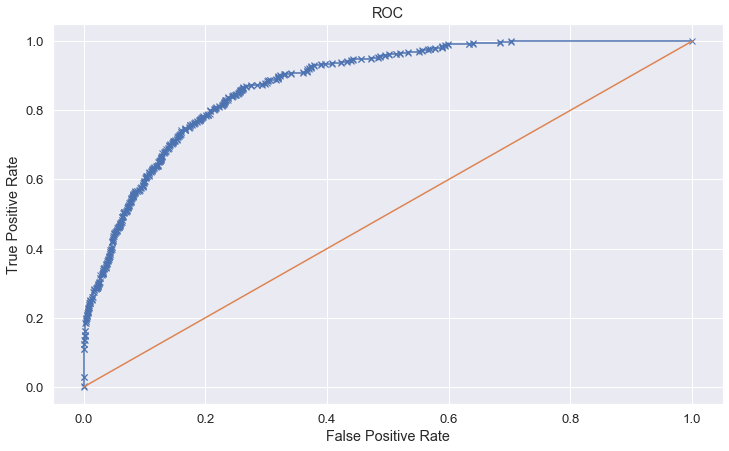

Area under Curve is 0.8779724892779133


In [133]:
# #from sklearn.metrics import roc_curve,roc_auc_score
# rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
# plt.figure(figsize=(12,7))
# plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
# plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
# plt.show()
# print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))
eval_models(best_grid, X_train, y_train, grid_pred_train)

In [134]:
# confusion_matrix(test_labels,ytest_predict)


array([[1022,    0],
       [ 193,    2]], dtype=int64)

In [135]:
# print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1022
           1       1.00      0.01      0.02       195

    accuracy                           0.84      1217
   macro avg       0.92      0.51      0.47      1217
weighted avg       0.87      0.84      0.77      1217



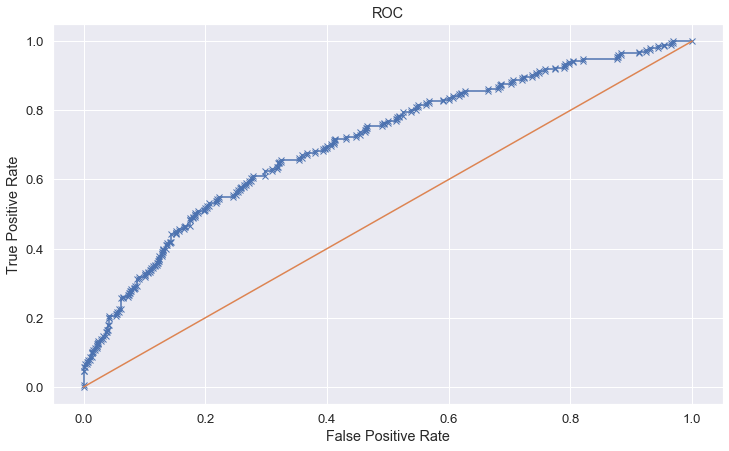

Area under Curve is 0.7096141301620753


In [136]:
# #from sklearn.metrics import roc_curve,roc_auc_score
# rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
# plt.figure(figsize=(12,7))
# plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
# plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
# plt.show()
# print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))

In [ ]:
eval_models(best_grid, X_test, y_test, grid_pred_train)

# Conclusion: the recall is not improved even with the GridSearchCv and hence we cannot use 
# the predicted model to predict heart attacks.

# Final Conclusion:

Here, we can see that even when we try other values for the hyper parameters, the model performance is not improving much. 

AUC is for train is 87 % and for test it is 70%. The problem of over fitting still exist, as there is a 17% gap between the train and test set. But still, the model is useful only in predicting class 0, and not class 1.

This is because, the dataset i`ms unbalanced, and so we have a class imbalance problem.

In the real world datasets, most of the time you will come across unbalanced datasets. To build a more robust classification model, this class imbalance needs to be addressed before building the model. This will be applicable to any kind of classification model. Once this issue is addressed and the model is built, further model tuning/optimization using grid search will result in improved performance. 
 
You will learn to deal with such imbalance in data using different performance improvement methods in the Machine Learning Course.
